# Concrete Strength Prediction with Interactive Widgets

##### *Yusuf Abolarinwa*

<img src = "thumbnail2-03.jpg">

# 1) Overview

The compressive strength of concrete is the most commonly used measure by engineers to determine if a concrete structure is suitable for its designed use. It is important to test concrete structures after the concrete has hardened to ensure that they meet the necessary structural requirements.

This project aims to develop an interactive MVP widget for predicting concrete compressive strength using a machine learning algorithm. The dashboard will enable users to input various concrete mixture parameters to visualize the predicted compressive strength in real-time.


# 2) Key Objectives

* Develop a predictive model.
* Evaluate model performance and refine as necessary.
* Visualize prediction results using plots and charts.
* Design interactive widgets (e.g., sliders, dropdowns) for early-adopters to input parameters and explore their impact on compressive strength.


# 2) Getting the data


### a) Data Source

https://archive.ics.uci.edu/dataset/165/concrete+compressive+strength




### b) Data Dictionary


`concrete_strength` Concrete compressive strength measured in Megapascals (MPa) is our target vector, y. It is the ability of a concrete material to resist loads that will squeeze or crush it.

 `cement` A powdered substance produced by calcining limestone and clay. It is a key ingredient in concrete.

`furnace_slag` A hard aggregrate remaining as a residue from blast furnances.

`fly_ash` A residue generated in combustion, comprising fine particles, and used in construction materials.

`water` Water, the component 4 in our feature matrix X.

`superplastic` A chemical used as an admixture to improve concrete, reducing aggregation.

`coarse_aggregate` Coarse Aggregate, component 6 in our feature matrix X. 

`fine_aggregate` Fine Aggregate, the component 7 in our feature matrix X.

`age` Age measured in days, the component 8 in our feature matrix X.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact

# 3) Loading the data

In [2]:
df_raw = pd.read_csv("data/concrete+compressive+strength.csv")
df_raw

,cement,furnace_slag,fly_ash,water,superplastic,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


# 4)  Data Wrangling and EDA

In [3]:
df = df_raw.copy()
df

,cement,furnace_slag,fly_ash,water,superplastic,coarse_aggregate,fine_aggregate,age,concrete_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


### (a) Checking for `NaN` values

Here, we will: 

* search and drop `NaN` values
* do a cross-check using the `info()` method

The commands in the cell below check for:

* total number missing values
* total number of cells in the data matrix
* percentage of missing values

In [4]:
total_miss_val = (df.isnull().sum()).sum()
total_cells = np.product(df.shape)

perc_miss_val = (total_miss_val/total_cells)*100
print("The % of missing values in this data set is:", str(round(perc_miss_val, 4)) +'%') 

The % of missing values in this data set is: 0.0%


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   cement             1030 non-null   float64
 1   furnace_slag       1030 non-null   float64
 2   fly_ash            1030 non-null   float64
 3   water              1030 non-null   float64
 4   superplastic       1030 non-null   float64
 5   coarse_aggregate   1030 non-null   float64
 6   fine_aggregate     1030 non-null   float64
 7   age                1030 non-null   int64  
 8   concrete_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


### (b) Detecting underlying issues

We will use `describe()` for better understanding of our data 

In [6]:
df.describe().iloc[1:,1:]  

,furnace_slag,fly_ash,water,superplastic,coarse_aggregate,fine_aggregate,age,concrete_strength
mean,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Let check the histograms

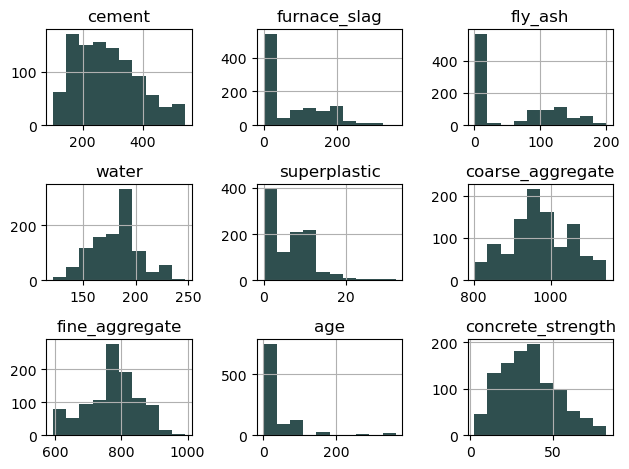

In [7]:
cols = df.columns

df[cols].hist(color = "DarkSlateGrey")
plt.tight_layout()

There are obvious problems to address:

* We have zero values in column `furnace_slag`(about 25%), `fly_ash`(about 50%), and `superplastic`(about 25%). The `fly_ash` column will be dropped.

*  We have columns with max values that are many SDs away from the mean, indicating outliers. We will restrict some of the columns by dropping values 2 SDs from the mean.

###  (c) Exclude outliers

Keeping outliers could complicate our model estimation. Also, since we can not tell the possible cause of the outliers, we have to handle them with care. 

In [8]:
df1 = df.copy()

print(np.mean(df1['age'])+ 2*np.std(df1['age']))
print(np.mean(df1['superplastic'])+ 2*np.std(df1['superplastic']))

171.94061417999706
18.146541724720255


In [9]:
cutoffs = (df["age"] < 170) & (df["superplastic"] < 18)
df1 = df1[cutoffs]

In [10]:
df1.describe()

,cement,furnace_slag,fly_ash,water,superplastic,coarse_aggregate,fine_aggregate,age,concrete_strength
count,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000,937.000000
mean,274.160406,73.678655,58.216649,180.947385,5.967769,975.841729,776.186126,32.438634,34.703138
std,101.610136,87.202673,64.400840,19.432939,5.005711,78.181033,75.336539,28.617891,16.608619
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,190.300000,0.000000,0.000000,164.900000,0.000000,932.000000,739.000000,7.000000,22.500000
50%,254.000000,20.000000,0.000000,184.400000,6.700000,971.800000,780.000000,28.000000,33.270000
75%,339.000000,145.000000,118.600000,192.000000,10.000000,1040.600000,822.200000,28.000000,44.520000
max,540.000000,359.400000,200.100000,247.000000,17.900000,1145.000000,945.000000,120.000000,81.750000


The command in the cell below dropped `fly_ash` as mentioned earlier in 4(b)

In [11]:
df1.drop(columns="fly_ash", inplace=True)

Let us have a look at the histogram once again

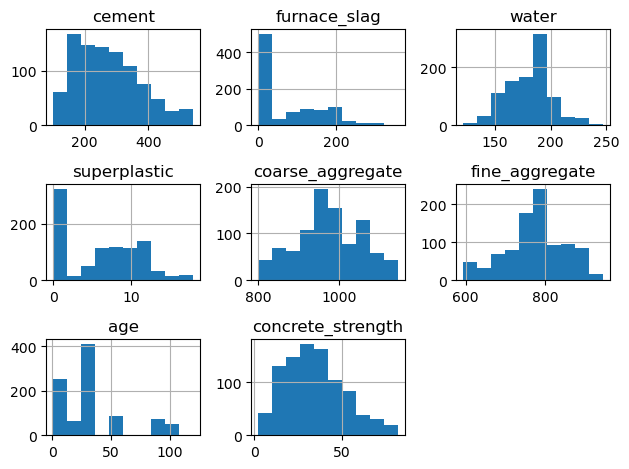

In [12]:
cols = df1.columns

df1[cols].hist()
plt.tight_layout()

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


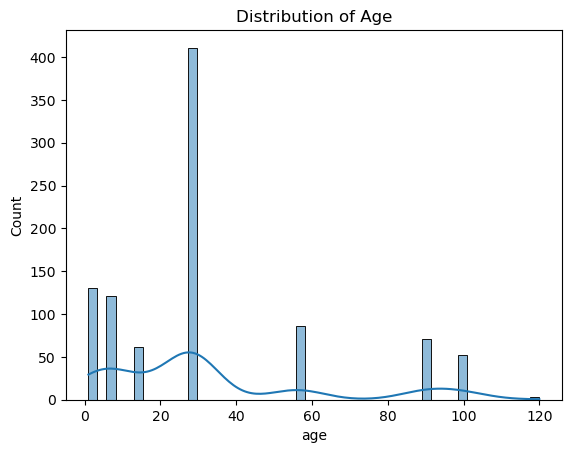

In [13]:
sns.histplot(df1["age"], bins=50, kde=True)
plt.title("Distribution of Age")
plt.show();

 # 5) Checking for linear relationship
 
### a) Screening features
 
 * We must look for strong correlations between features to avoid problems with multicollinearity.

 * Features that change very little may have little impact.

### i) Correlation between features

In [14]:
feat_cols = ["age","cement","superplastic","water","fine_aggregate","coarse_aggregate","furnace_slag"]

corr = df1[feat_cols].corr()
corr

,age,cement,superplastic,water,fine_aggregate,coarse_aggregate,furnace_slag
age,1.000000,-0.037372,0.056902,-0.029706,0.045305,0.022586,-0.036810
cement,-0.037372,1.000000,0.005503,-0.063771,-0.239314,-0.095246,-0.269557
superplastic,0.056902,0.005503,1.000000,-0.599977,0.148040,-0.206144,0.005825
water,-0.029706,-0.063771,-0.599977,1.000000,-0.372603,-0.253539,0.138225
fine_aggregate,0.045305,-0.239314,0.148040,-0.372603,1.000000,-0.175052,-0.303142
coarse_aggregate,0.022586,-0.095246,-0.206144,-0.253539,-0.175052,1.000000,-0.286308
furnace_slag,-0.036810,-0.269557,0.005825,0.138225,-0.303142,-0.286308,1.000000


Observations:

* The correlation matrix above has no highly correlated features (correlation of 0.8 or greater).

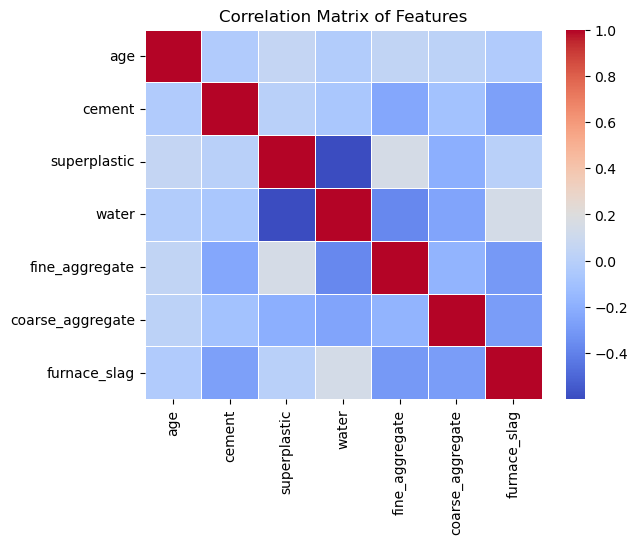

In [15]:
sns.heatmap(corr, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

### ii) Correlation between `concrete_strength` and features

In [16]:
all_cols = ["concrete_strength","age","cement","superplastic","water","fine_aggregate","coarse_aggregate","furnace_slag"]
df1[all_cols].corr()[["concrete_strength"]].iloc[1:]

,concrete_strength
age,0.518710
cement,0.470992
superplastic,0.386847
water,-0.333306
fine_aggregate,-0.161593
coarse_aggregate,-0.155697
furnace_slag,0.135935


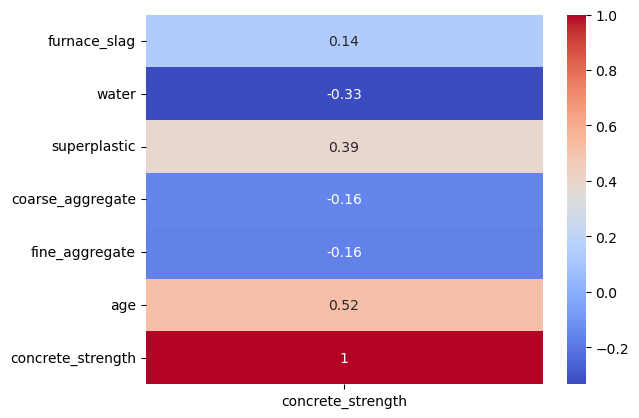

In [17]:
sns.heatmap(df1[cols].corr()[['concrete_strength']].iloc[1:], annot=True, cmap='coolwarm');

* The scatter plots below provide similar information as the correlation matrices

c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

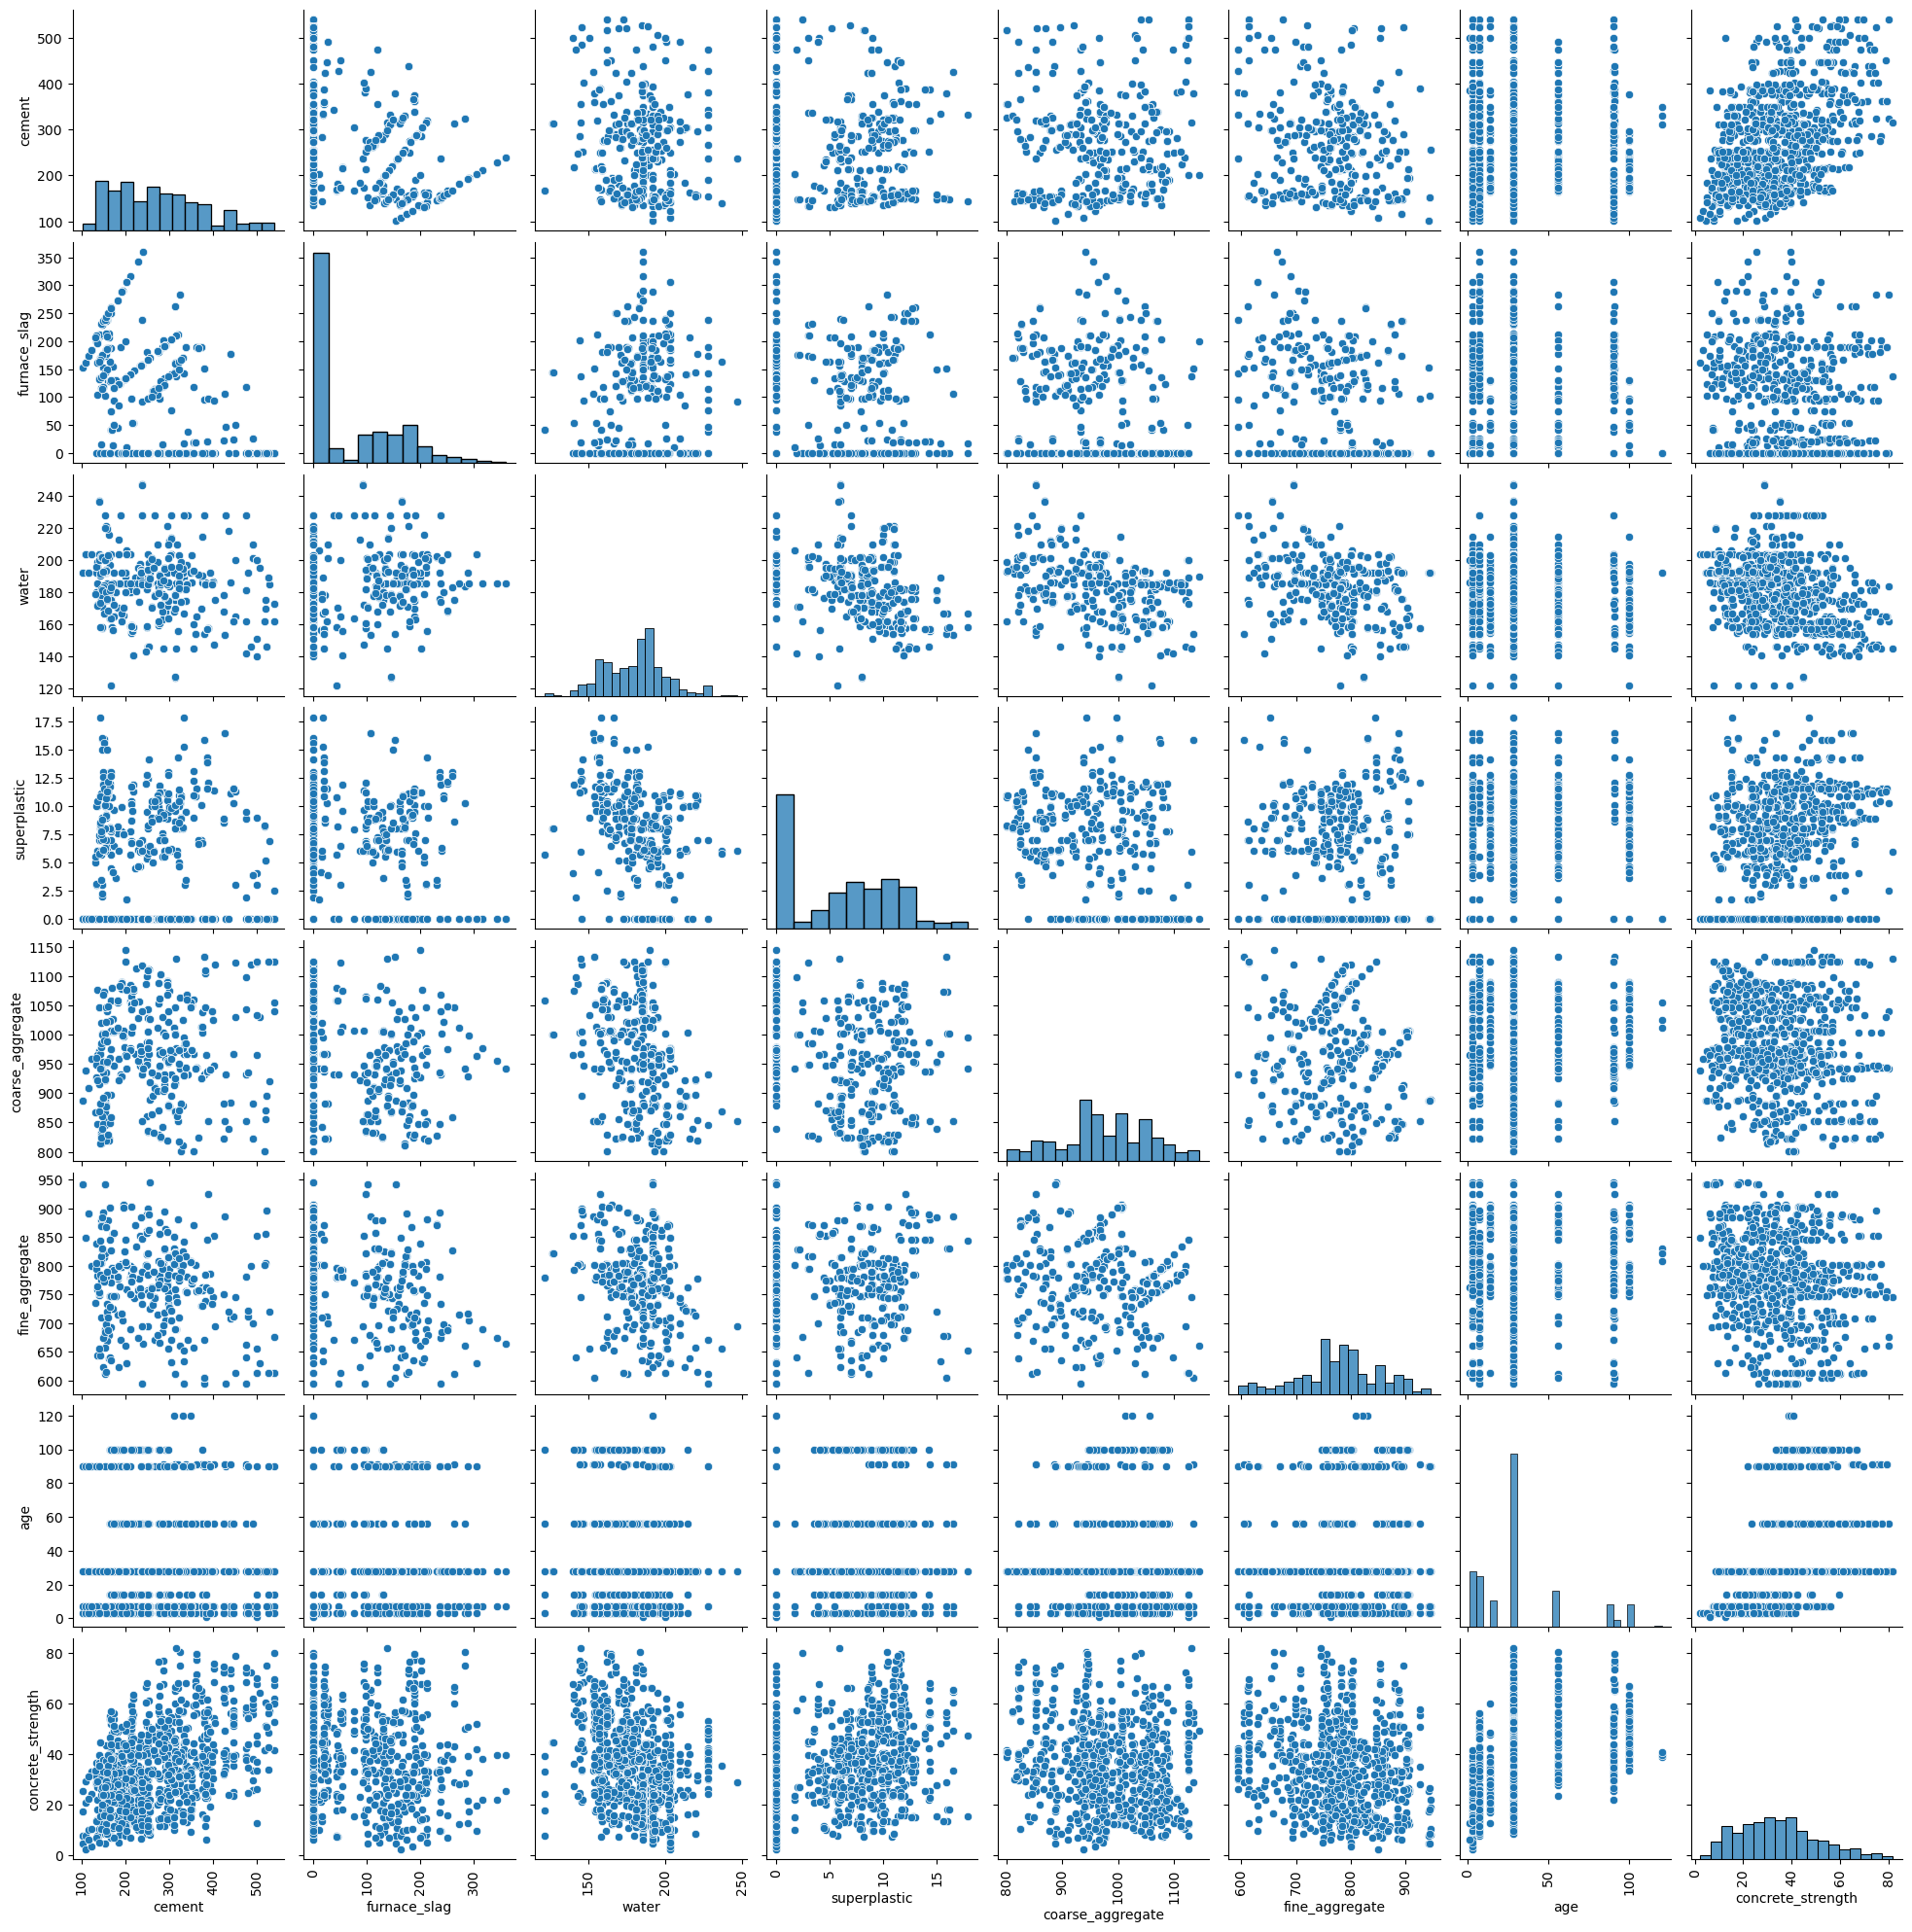

In [18]:
g = sns.pairplot(df1[cols])
for ax in g.axes.flatten():    # from [6]
    for tick in ax.get_xticklabels(): 
        tick.set(rotation=90);

# 6) Build Model

### a) Split Data

i)  Here, we separate the feature matrix X from the 1-Dimensional target vector, y (= concrete_strength)

In [19]:
target = "concrete_strength"
features = list(df1.columns[:-1])

X = df1.drop(columns=target)
y = df1[target]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (937, 7)
y shape: (937,)


ii) Another form of splitting but horizontally into training versus test. With 80% to the training set while 20% for the test set.    

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### b) Baseline Mean Absolute Error (MAE)

*Why MEAN ABSOLUTE ERROR and not MEAN SQUARE ERROR?*

Instead of squaring the error terms, `mean_absolute_error` takes absolute value of the differences between predicted and actual values. This attribute makes `mean_absolute_error` inherently robust to *Outliers*. Unlike `mean_square_error`, `mean_absolute_error` treats all errors equally, minimizing the impact of *Outliers* on the *Loss Function*

In [21]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)

print("Mean Concrete Strength: {:.2f}".format(y_mean))
print("Baseline MAE: {:.2f}".format(mean_absolute_error(y_train, y_pred_baseline)))

Mean Concrete Strength: 34.47
Baseline MAE: 13.27


### c) Instantiate & train model

We instantiate `LinearRegression()` method from scikit-learn library and fit it to the training data, `X_train` and `y_train`

In [22]:
model_line = LinearRegression()
lr = model_line.fit(X_train, y_train)
lr

LinearRegression()

# 7) Evaluate model

### a) Training MAE performance

Our model's MAE beats the baseline MAE by 6.73 Megapascals. This is a good sign, but lets not be too optimistic.

In [23]:
y_pred_training = model_line.predict(X_train)
print("Training MAE: {:.2f}".format(mean_absolute_error(y_train, y_pred_training)))

Training MAE: 6.54


### b) Training Vs Test data R^2 performance

Coefficient of determination, R-Squared is an alternative to `mean_absolute_error` and a more intuitive performance metric. It measures the amount of variation in `concrete_strength` explained by the model.

In [24]:
print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))

Training set score: 0.7399
Test set score: 0.8034


A honest remark on our model:

* Our model beat its training R-squared score by 6%. An 80% performance on the test set is a brilliant result. This is an indication that it will perform well on new or unseen data. 

* However we should not be too optimistic, because it also suggests some variation in the data that the model failed to explain or address.

*  A more sophisticated model like Random Forest might do a better job in handling or explaining the complexity in `concrete_strength` (including the unexplained 20% variation by our model).

# 8) Communicate results

### a) Extract Model Intercept

In [25]:
Intercept = round(model_line.intercept_, 6)
print("Model Intercept:", Intercept)

Model Intercept: 98.364426


### b) Extract Model Coefficient

In [26]:
coefficients = pd.DataFrame([features, model_line.coef_.tolist()], index=['feature', 'coefficients']).T
coefficients

,feature,coefficients
0,cement,0.076864
1,furnace_slag,0.046709
2,water,-0.271097
3,superplastic,0.526844
4,coarse_aggregate,-0.027505
5,fine_aggregate,-0.032931
6,age,0.313295


### c) Plot Predictions against True values

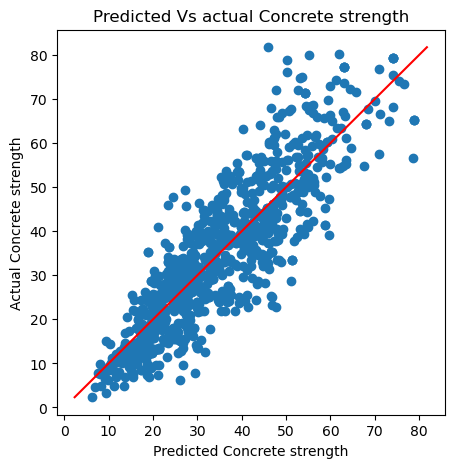

In [27]:
predicted = model_line.predict(X)
fig, ax = plt.subplots(figsize=(5,5));
plt.scatter(predicted, y);
plt.plot([min(y), max(y)], [min(y), max(y)], '-', color="red");
plt.title('Predicted Vs actual Concrete strength');
plt.xlabel('Predicted Concrete strength');
plt.ylabel('Actual Concrete strength');

### d) Prediction Function for `concrete_strength`

In [28]:
def make_prediction(cement, slag, water, superplastic , coarse , fine, age ):
                    data = {
                        "cement": cement,
                        "furnace_slag": slag,
                        "water": water,
                        "superplastic": superplastic,
                        "coarse_aggregate": coarse,
                        "fine_aggregate": fine,
                        "age": age
                    }
                    df1 = pd.DataFrame(data, index=[0])
                    prediction = model_line.predict(df1).round(2)
                    
                    return f"Concrete Compressive Strength: {prediction} Megapascals"

The command in the cell below test the prediction function of the `concrete_strength` model with:
* 1kg of Cement
* 1kg of Blast furnace slag
* 1kg of Water
* 1kg of Superplasticizer
* 1kg of Coarse aggregate
* 1kg of fine aggregate
* In 365 days




In [29]:
make_prediction(1,1,1,1,1,1,365)

'Concrete Compressive Strength: [213.04] Megapascals'

### e) Interactive Prediction Widget for non-technical users

In [30]:
interact(

    make_prediction,
    cement = FloatSlider(
        min = X_train["cement"].min(),
        max = X_train["cement"].max(),
        step = 0.01,
        value = X_train["cement"].mean(),
        ),

    slag = FloatSlider(
        min = X_train["furnace_slag"].min(),
        max = X_train["furnace_slag"].max(),
        step = 0.01,
        value = X_train["furnace_slag"].mean(),
        ),

    water = FloatSlider(
        min = X_train["water"].min(),
        max = X_train["water"].max(),
        step = 0.01,
        value = X_train["water"].mean(),
        ),
    superplastic = FloatSlider(
        min = X_train["superplastic"].min(),
        max = X_train["superplastic"].max(),
        step = 0.01,
        value = X_train["superplastic"].mean(),
        ),
    coarse = FloatSlider(
        min = X_train["coarse_aggregate"].min(),
        max = X_train["coarse_aggregate"].max(),
        step = 0.01,
        value = X_train["coarse_aggregate"].mean(),
        ),
    fine = FloatSlider(
        min = X_train["fine_aggregate"].min(),
        max = X_train["fine_aggregate"].max(),
        step = 0.01,
        value = X_train["fine_aggregate"].mean(),
        ),
    age = IntSlider(
        min = X_train["age"].min(),
        max = X_train["age"].max(),
        value = X_train["age"].mean(),
        ),
    
    );


interactive(children=(FloatSlider(value=273.84846461949263, description='cement', max=540.0, min=102.0, step=0…